# Timeseries of average of Transport files from Observational Data
*Akira Di Sandro, 6/24/20*
<br>
In this notebook, I will be plotting time series of transport averaged across all the files in Marion's observational data.

## 1.  Import packages and Load in data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [55]:
#!python
#!/usr/bin/env python
from scipy.io import loadmat
x = loadmat('allTransport_SolomonStrait.mat')
# one-liner to read a single variable
#lon = loadmat('test.mat')['lon']

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [3]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

### b. Timestamps in vector format for python

In [4]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [5]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries

First, I have to average out all the values from the different arrays. Then, I can use those values to make a plot like before (in the other notebooks).

In [52]:
total = []

In [61]:
for i in range(len(x['T'])):
    if i == 0:
        total = x['T'][0]
    else:
        for j in range(len(x['T'][0])):
            total[j] += x['T'][i][j]
for i in range(len(total)):
    total[i] = total[i]/len(x['T'])
print(total[0])

742.1656719932969
15.461784833193684


Now, to make the plot:

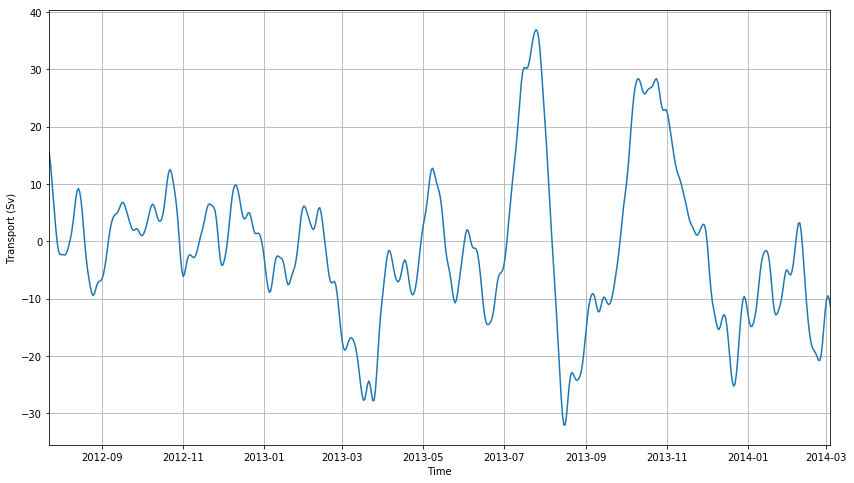

In [63]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, total)
ax.set_xlim(py_dt[0], py_dt[-1])
ax.grid(True)
plt.show()